In [104]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
plt.style.use('ggplot')
%matplotlib inline

In [108]:
# Microbenchmark Measurement Data
json_kernel = np.loadtxt(fname = "./data/json/kernel.log")
json_init = np.loadtxt(fname = "./data/json/init.log")
json_unzip = np.loadtxt(fname = "./data/json/unzip.log")
json_import = np.loadtxt(fname = "./data/json/import.log")
json_app = np.loadtxt(fname = "./data/json/app.log")

base64_kernel = np.loadtxt(fname = "./data/base64/kernel.log")
base64_init = np.loadtxt(fname = "./data/base64/init.log")
base64_unzip = np.loadtxt(fname = "./data/base64/unzip.log")
base64_import = np.loadtxt(fname = "./data/base64/import.log")
base64_app = np.loadtxt(fname = "./data/base64/app.log")

http_kernel = np.loadtxt(fname = "./data/http/kernel.log")
http_init = np.loadtxt(fname = "./data/http/init.log")
http_unzip = np.loadtxt(fname = "./data/http/unzip.log")
http_import = np.loadtxt(fname = "./data/http/import.log")
http_app = np.loadtxt(fname = "./data/http/app.log")

primes_kernel = np.loadtxt(fname = "./data/primes/kernel.log")
primes_init = np.loadtxt(fname = "./data/primes/init.log")
primes_unzip = np.loadtxt(fname = "./data/primes/unzip.log")
primes_import = np.loadtxt(fname = "./data/primes/import.log")
primes_app = np.loadtxt(fname = "./data/primes/app.log")

markdown2html_kernel = np.loadtxt(fname = "./data/markdown2html/kernel.log")
markdown2html_init = np.loadtxt(fname = "./data/markdown2html/init.log")
markdown2html_unzip = np.loadtxt(fname = "./data/markdown2html/unzip.log")
markdown2html_import = np.loadtxt(fname = "./data/markdown2html/import.log")
markdown2html_app = np.loadtxt(fname = "./data/markdown2html/app.log")

sentiment_kernel = np.loadtxt(fname = "./data/sentiment/kernel.log")
sentiment_init = np.loadtxt(fname = "./data/sentiment/init.log")
sentiment_unzip = np.loadtxt(fname = "./data/sentiment/unzip.log")
sentiment_import = np.loadtxt(fname = "./data/sentiment/import.log")
sentiment_app = np.loadtxt(fname = "./data/sentiment/app.log")

In [109]:
json_import

array([418., 367., 351., 360., 345., 354., 352., 359., 354., 341., 361.,
       368., 374., 348., 361., 368., 361., 371., 349., 365., 364., 354.,
       353., 368., 377., 372., 345., 359., 371., 364., 337., 356., 354.,
       356., 371., 371., 362., 371., 369., 359., 361., 360., 357., 372.,
       348., 367., 368., 365., 354., 350., 365., 376., 364., 366., 363.,
       343., 354., 355., 361., 374., 369., 350., 377., 353., 353., 379.,
       369., 358., 395., 377., 353., 355., 375., 374., 369., 381., 367.,
       380., 382., 366., 372., 367., 370., 357., 360., 363., 366., 375.,
       340., 379., 363., 335., 380., 380., 361., 369., 359., 370., 353.,
       339.])

In [110]:
def check_size(kernel,init,unzip,im,app):
    assert(len(kernel)==len(init)==len(unzip)==len(im)==len(app))

In [111]:
def preprocess(kernel,init,unzip,im,app):
    return kernel, init-kernel,  unzip-init,  im-unzip,app-im

In [112]:
check_size(json_kernel, json_init, json_unzip, json_import, json_app)
check_size(base64_kernel, base64_init, base64_unzip, base64_import, base64_app)
check_size(primes_kernel, primes_init, primes_unzip, primes_import, primes_app)
check_size(http_kernel, http_init, http_unzip, http_import, http_app)
check_size(markdown2html_kernel, markdown2html_init, markdown2html_unzip, markdown2html_import, markdown2html_app)
check_size(sentiment_kernel, sentiment_init, sentiment_unzip, sentiment_import, sentiment_app)

In [113]:
#json_app = json_app - json_import; json_import = json_import - json_unzip;json_unzip = json_unzip - json_init; json_init = json_init - json_kernel
(json_kernel, json_init, json_unzip, json_import, json_app) = preprocess(json_kernel, json_init, json_unzip, json_import, json_app)
(base64_kernel, base64_init, base64_unzip, base64_import, base64_app) = preprocess(base64_kernel, base64_init, base64_unzip, base64_import, base64_app)
(primes_kernel, primes_init, primes_unzip, primes_import, primes_app) = preprocess(primes_kernel, primes_init, primes_unzip, primes_import, primes_app)
(http_kernel, http_init, http_unzip, http_import, http_app) = preprocess(http_kernel, http_init, http_unzip, http_import, http_app)
(markdown2html_kernel, markdown2html_init, markdown2html_unzip, markdown2html_import, markdown2html_app) = preprocess(markdown2html_kernel, markdown2html_init, markdown2html_unzip, markdown2html_import, markdown2html_app)
(sentiment_kernel, sentiment_init, sentiment_unzip, sentiment_import, sentiment_app) = preprocess(sentiment_kernel, sentiment_init, sentiment_unzip, sentiment_import, sentiment_app)

In [114]:
markdown2html_import

array([438., 436., 434., 445., 441., 438., 432., 440., 434., 442., 429.,
       440., 441., 450., 437., 437., 440., 450., 451., 432., 444., 438.,
       437., 433., 426., 433., 436., 436., 441., 421., 456., 439., 458.,
       445., 460., 458., 461., 458., 436., 436., 432., 438., 434., 436.,
       446., 567., 438., 443., 462., 429., 452., 434., 434., 436., 445.,
       443., 431., 436., 436., 439., 446., 445., 436., 432., 443., 441.,
       443., 434., 437., 438., 441., 438., 442., 450., 443., 444., 450.,
       441., 447., 441., 457., 434., 431., 441., 433., 434., 435., 483.,
       480., 447., 432., 454., 435., 433., 439., 440., 449., 443., 443.,
       352.])

In [115]:
kave = np.array([np.mean(json_kernel), np.mean(base64_kernel), np.mean(http_kernel), np.mean(primes_kernel), np.mean(markdown2html_kernel), np.mean(sentiment_kernel)])
iave = np.array([np.mean(json_init), np.mean(base64_init), np.mean(http_init), np.mean(primes_init), np.mean(markdown2html_init), np.mean(sentiment_init)])
zave = np.array([np.mean(json_unzip), np.mean(base64_unzip), np.mean(http_unzip), np.mean(primes_unzip), np.mean(markdown2html_unzip), np.mean(sentiment_unzip)])
mave = np.array([np.mean(json_import), np.mean(base64_import), np.mean(http_import), np.mean(primes_import), np.mean(markdown2html_import), np.mean(sentiment_import)])
aave = np.array([np.mean(json_app), np.mean(base64_app), np.mean(http_app), np.mean(primes_app), np.mean(markdown2html_app), np.mean(sentiment_app)])

In [116]:
zave

array([4.27, 3.27, 3.89, 3.57, 4.51, 3.7 ])

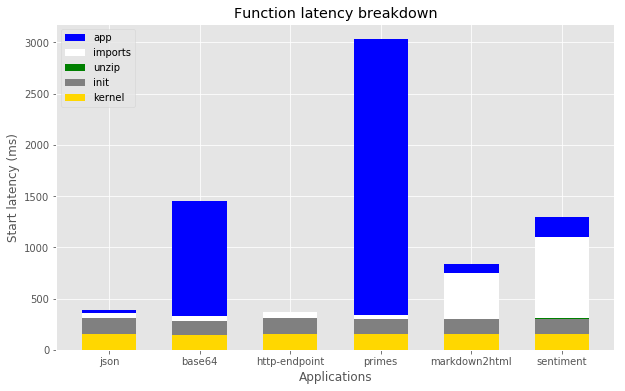

In [119]:
idx = ['json', 'base64','http-endpoint', 'primes', 'markdown2html','sentiment']
ind = [x for x, _ in enumerate(idx)]
plt.figure(figsize=(10,6))

plt.bar(ind, aave, width=0.6, label = 'app', color = 'b', bottom = mave+zave+iave+kave)
plt.bar(ind, mave, width=0.6, label = 'imports', color = 'w', bottom = zave+iave+kave)
plt.bar(ind, zave, width=0.6, label = 'unzip', color = 'green', bottom = iave+kave)
plt.bar(ind, iave, width=0.6, label = 'init', color = 'gray', bottom = kave)
plt.bar(ind, kave, width=0.6, label = 'kernel', color = 'gold')
plt.xticks(ind, idx)
plt.ylabel("Start latency (ms)")
plt.xlabel("Applications")
plt.legend(loc = "upper left")
plt.title("Function latency breakdown")

plt.show()